**Set environment**

In [1]:
suppressWarnings(suppressMessages(source("../config/config_sing.R")))

**Check data**

In [2]:
fdiry  = file.path(FD_RES, "results", "Tewhey_K562_TileMPRA", "coverage", "track_counts")
fpaths = dir(fdiry)
fpaths = grep("mean", fpaths, value = TRUE)
print(fpaths)

 [1] "Merge.hg38.norm.Log2FC.mean.stranded_pos.bed.gz"        
 [2] "Merge.hg38.norm.Log2FC.mean.stranded_pos.bg"            
 [3] "Merge.hg38.norm.Log2FC.mean.stranded_pos.bw"            
 [4] "OL13_20220512.hg38.norm.Input.mean.stranded_pos.bed.gz" 
 [5] "OL13_20220512.hg38.norm.Input.mean.stranded_pos.bg"     
 [6] "OL13_20220512.hg38.norm.Input.mean.stranded_pos.bw"     
 [7] "OL13_20220512.hg38.norm.Log2FC.mean.stranded_pos.bed.gz"
 [8] "OL13_20220512.hg38.norm.Log2FC.mean.stranded_pos.bg"    
 [9] "OL13_20220512.hg38.norm.Log2FC.mean.stranded_pos.bw"    
[10] "OL13_20220512.hg38.norm.Output.mean.stranded_pos.bed.gz"
[11] "OL13_20220512.hg38.norm.Output.mean.stranded_pos.bg"    
[12] "OL13_20220512.hg38.norm.Output.mean.stranded_pos.bw"    
[13] "OL43_20221003.hg38.norm.Input.mean.stranded_pos.bed.gz" 
[14] "OL43_20221003.hg38.norm.Input.mean.stranded_pos.bg"     
[15] "OL43_20221003.hg38.norm.Input.mean.stranded_pos.bw"     
[16] "OL43_20221003.hg38.norm.Log2FC.mean.stranded_pos.

In [3]:
fdiry = file.path(FD_RES, "results", "Tewhey_K562_TileMPRA", "coverage", "track_normalized")
fpaths = dir(fdiry)
fpaths = grep("Log2FC", fpaths, value = TRUE)
print(fpaths)

[1] "OL13_20220512.hg38.raw.pLog2FC.mean.stranded_pos.bed.gz"
[2] "OL43_20221003.hg38.raw.pLog2FC.mean.stranded_pos.bed.gz"
[3] "OL45_20220927.hg38.raw.pLog2FC.mean.stranded_pos.bed.gz"


In [4]:
### set path
fdiry = file.path(FD_RES, "results", "Tewhey_K562_TileMPRA", "coverage", "track_normalized")
fname = "OL43_20221003.hg38.raw.pLog2FC.mean.stranded_pos.bed.gz"
fpath = file.path(fdiry, fname)

### read data
cnames = c("Chrom", "Start", "End", "Input", "Output", "pLog2FC")
ctypes = cols(
    "Chrom"   = col_character(),
    "Start"   = col_integer(),
    "End"     = col_integer(),
    "Input"   = col_double(), 
    "Output"  = col_double(),
    "pLog2FC" = col_double()
)
dat = read_tsv(fpath, col_names = cnames, col_types = ctypes)

### assign and show
dat_track_log2fc_raw = dat
print(dim(dat))
head(dat)

[1] 3915373       6


Chrom,Start,End,Input,Output,pLog2FC
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>
chr8,126735901,126735902,17.8462,60.8244,1.7139
chr8,126735902,126735903,17.8462,60.8244,1.7139
chr8,126735903,126735904,17.8462,60.8244,1.7139
chr8,126735904,126735905,17.8462,60.8244,1.7139
chr8,126735905,126735906,17.8462,60.8244,1.7139
chr8,126735906,126735907,17.8462,60.8244,1.7139


In [5]:
PREFIX = "OL43"
GROUPS = c("Input", "Output", "Log2FC")

fdiry  = file.path(FD_RES, "results", "Tewhey_K562_TileMPRA", "coverage", "track_counts")
lst = lapply(GROUPS, function(GROUP){
    fname = paste(PREFIX, "hg38", "norm", GROUP, "mean", "gz", sep="*")
    fglob = file.path(fdiry, fname)
    fpath = Sys.glob(fglob)
    
    ### read data
    cnames = c("Chrom", "Start", "End", "Score")
    ctypes = cols(
        "Chrom"  = col_character(),
        "Start"  = col_integer(),
        "End"    = col_integer(),
        "Score"  = col_double()
    )
    dat = read_tsv(fpath, col_names = cnames, col_types = ctypes)
    dat = dat %>% mutate(Group = GROUP)
    return(dat)
})

dat = bind_rows(lst) %>% spread(Group, Score)

### assign and show
dat_track_log2fc_norm = dat
print(dim(dat))
head(dat)

[1] 3915373       6


Chrom,Start,End,Input,Log2FC,Output
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>
chr8,126735901,126735902,815.679,3.197,7477.752
chr8,126735902,126735903,815.679,3.197,7477.752
chr8,126735903,126735904,815.679,3.197,7477.752
chr8,126735904,126735905,815.679,3.197,7477.752
chr8,126735905,126735906,815.679,3.197,7477.752
chr8,126735906,126735907,815.679,3.197,7477.752


## GATA1 region

In [27]:
### init
CHROM = "chrX"
START = 48780000
END   = 48810000

### filter
dat = dat_track_log2fc_raw
dat = dat %>% dplyr::filter(Chrom == CHROM, Start >= START, End <= END)

### assign and show
dat_track = dat
print(dim(dat))
head(dat)

[1] 29999     6


Chrom,Start,End,Input,Output,pLog2FC
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>
chrX,48780000,48780001,33.0707,11.7234,-1.42105
chrX,48780001,48780002,48.4936,17.1131,-1.45021
chrX,48780002,48780003,48.4936,17.1131,-1.45021
chrX,48780003,48780004,48.4936,17.1131,-1.45021
chrX,48780004,48780005,48.4936,17.1131,-1.45021
chrX,48780005,48780006,48.4936,17.1131,-1.45021


In [28]:
dat = dat_track

###
gp1 = ggplot() + geom_line(data=dat, aes(x=Start, y=Input))
gp2 = ggplot() + geom_line(data=dat, aes(x=Start, y=Output))
gp3 = ggplot() + geom_line(data=dat, aes(x=Start, y=pLog2FC))


###
lst = list(gp1, gp2, gp3)
lst = lapply(lst, function(gpt){
    gpt = gpt + 
        geom_hline(yintercept = 0, color="grey50") + 
        labs(x="") +
        theme_cowplot()
    return(gpt)
})

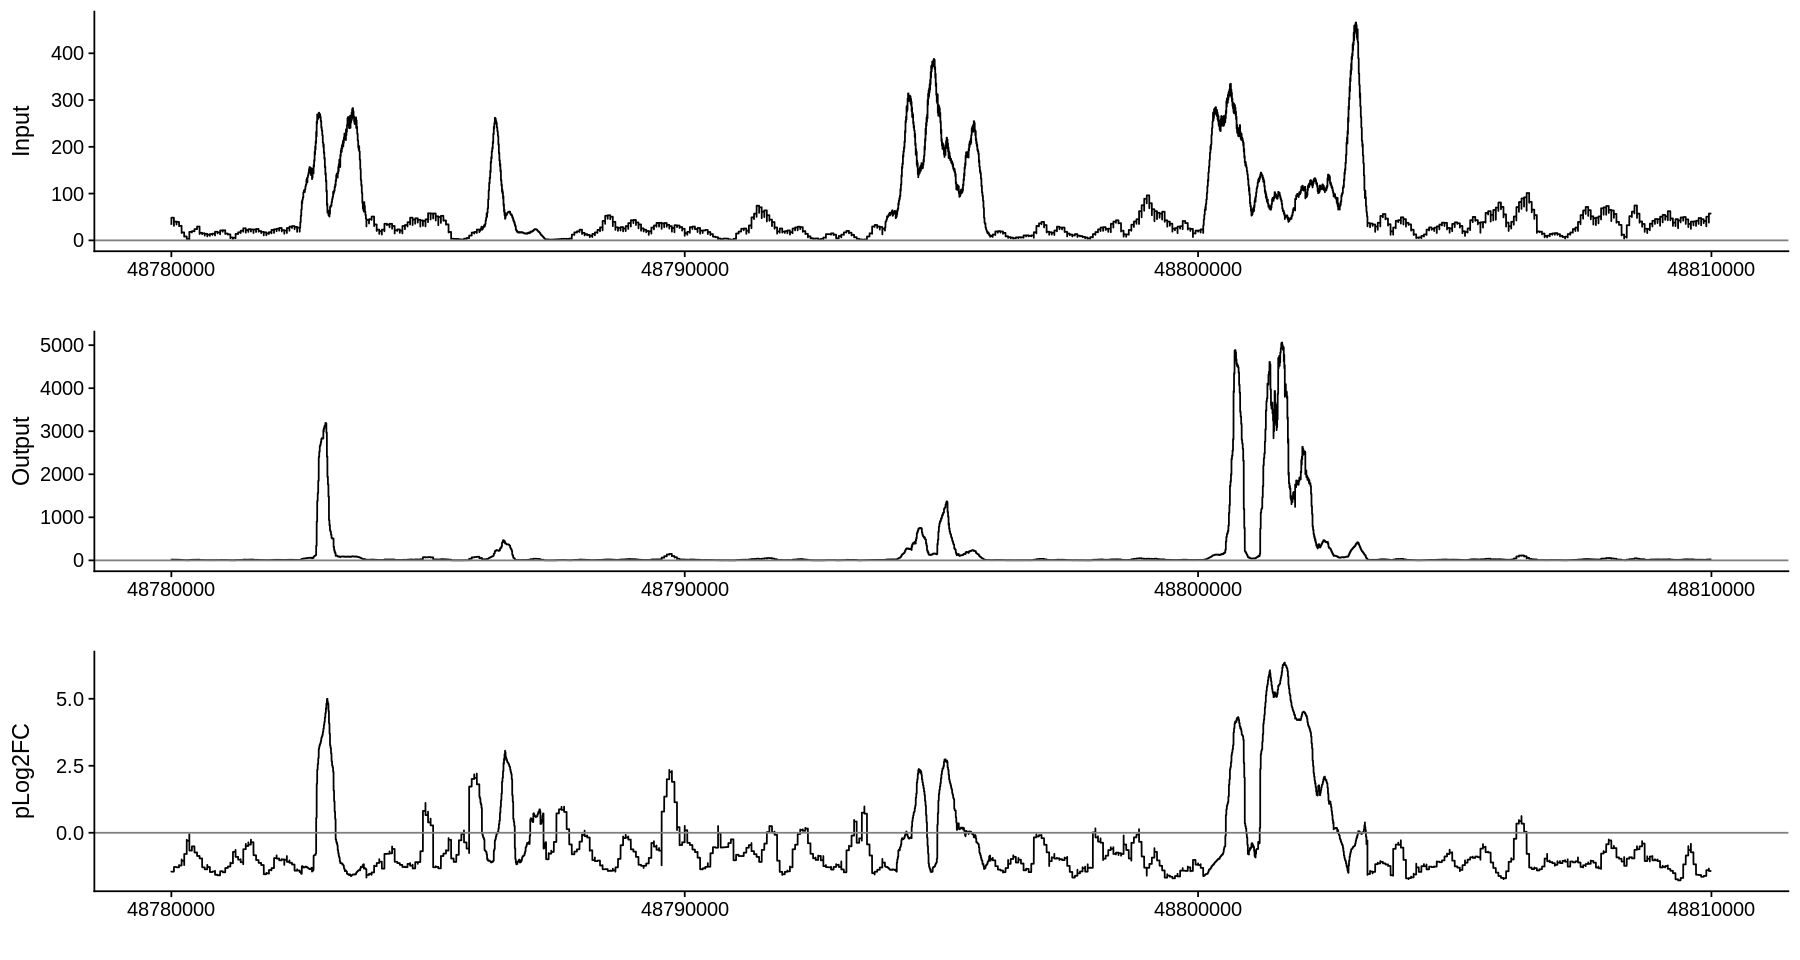

In [29]:
options(repr.plot.height=8, repr.plot.width=15)
plot_grid(plotlist = lst, align="v", ncol=1)

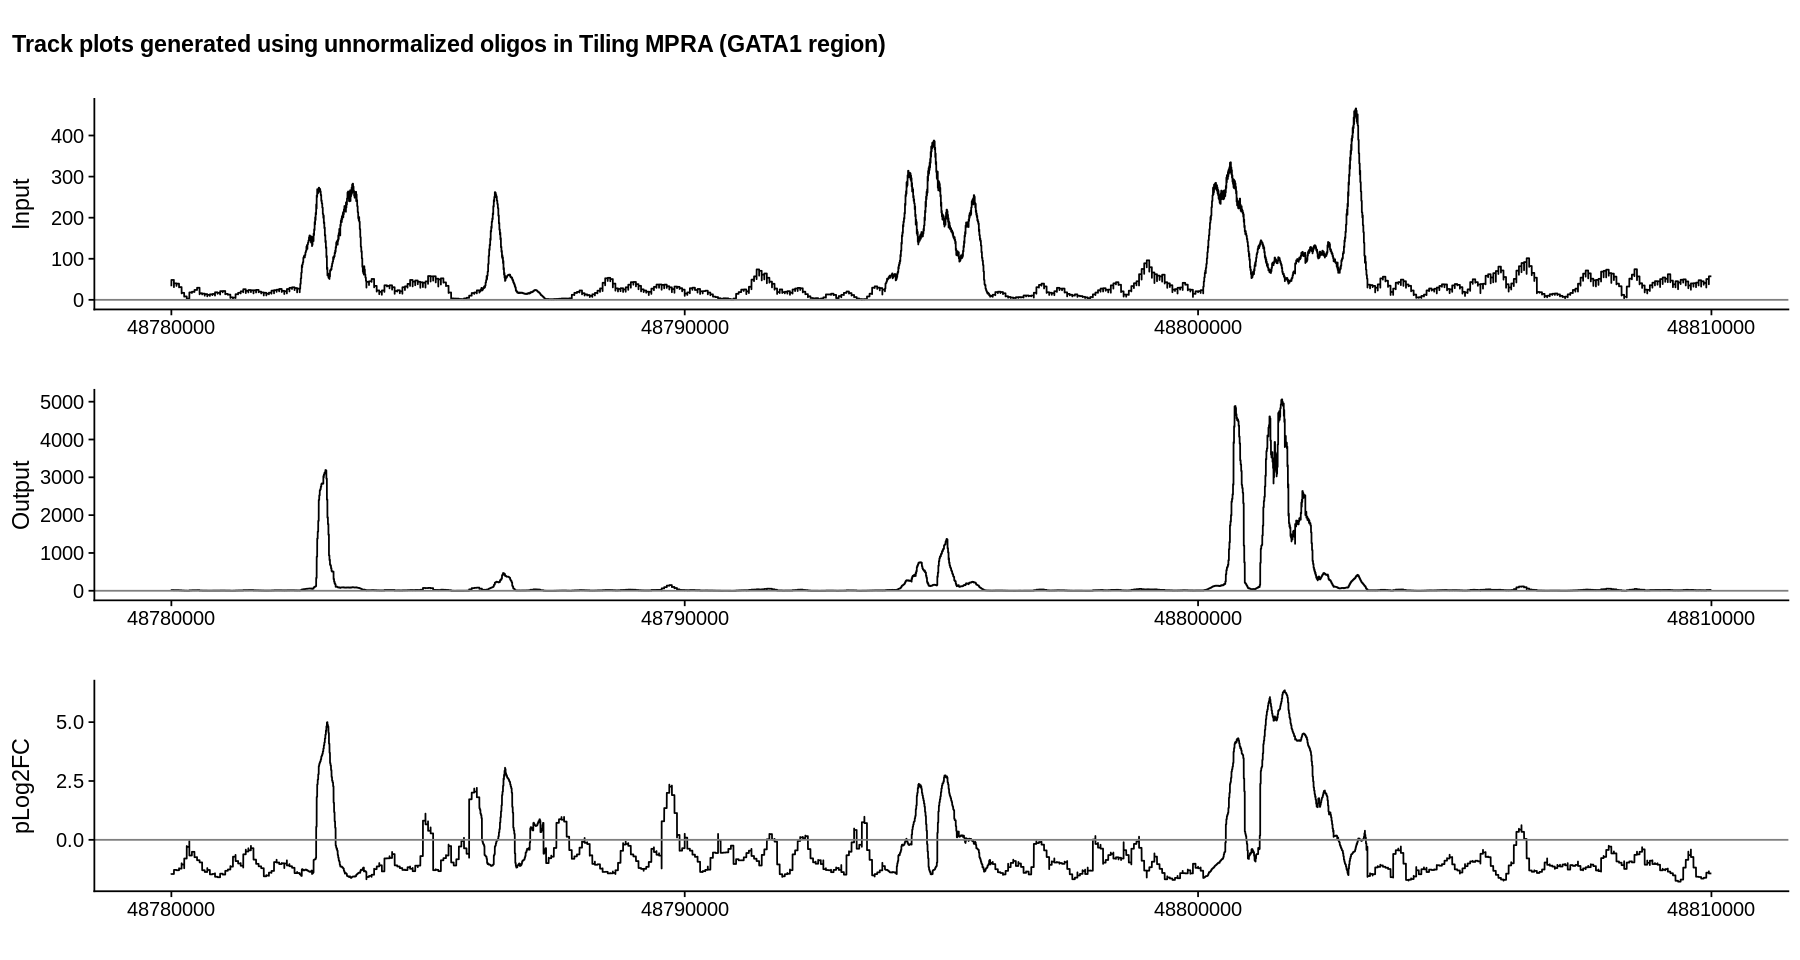

In [30]:
title = ggdraw() + 
  draw_label(
    "Track plots generated using unnormalized oligos in Tiling MPRA (GATA1 region)",
    fontface = 'bold',
    x = 0,
    hjust = 0
  ) +
  theme(
    # add margin on the left of the drawing canvas,
    # so title is aligned with left edge of first plot
    plot.margin = margin(0, 0, 0, 7)
  )

plot_row = plot_grid(plotlist = lst, align="v", ncol=1)

options(repr.plot.height=8, repr.plot.width=15)
plot_grid(
  title, plot_row,
  ncol = 1,
  # rel_heights values control vertical title margins
  rel_heights = c(0.1, 1)
)

In [31]:
### init
CHROM = "chrX"
START = 48780000
END   = 48810000

### filter
dat = dat_track_log2fc_norm
dat = dat %>% dplyr::filter(Chrom == CHROM, Start >= START, End <= END)

### assign and show
dat_track = dat
print(dim(dat))
head(dat)

[1] 29999     6


Chrom,Start,End,Input,Log2FC,Output
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>
chrX,48780000,48780001,1511.398,-0.04300,1435.115
chrX,48780001,48780002,2216.256,-0.05725,2092.566
chrX,48780002,48780003,2216.256,-0.05725,2092.566
chrX,48780003,48780004,2216.256,-0.05725,2092.566
chrX,48780004,48780005,2216.256,-0.05725,2092.566
chrX,48780005,48780006,2216.256,-0.05725,2092.566


In [32]:
dat = dat_track

###
gp1 = ggplot() + geom_line(data=dat, aes(x=Start, y=Input))
gp2 = ggplot() + geom_line(data=dat, aes(x=Start, y=Output))
gp3 = ggplot() + geom_line(data=dat, aes(x=Start, y=Log2FC))


###
lst = list(gp1, gp2, gp3)
lst = lapply(lst, function(gpt){
    gpt = gpt + 
        geom_hline(yintercept = 0, color="grey50") + 
        labs(x="") +
        theme_cowplot()
    return(gpt)
})

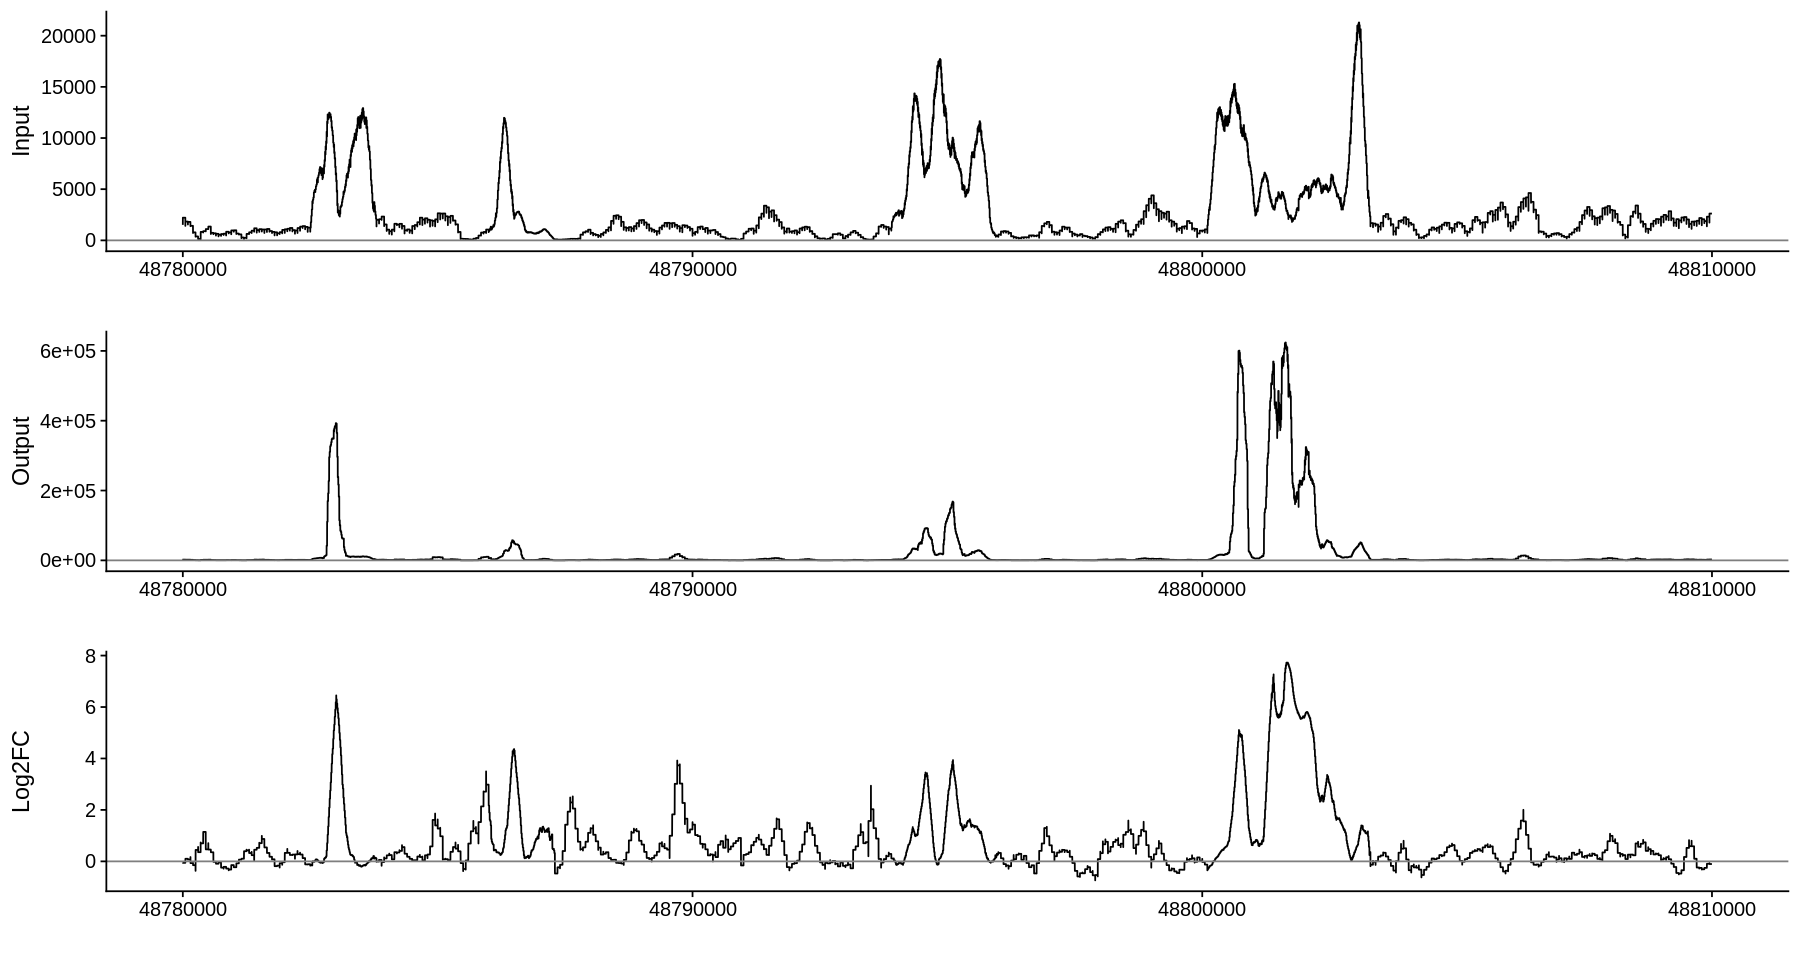

In [33]:
options(repr.plot.height=8, repr.plot.width=15)
plot_grid(plotlist = lst, align="v", ncol=1)

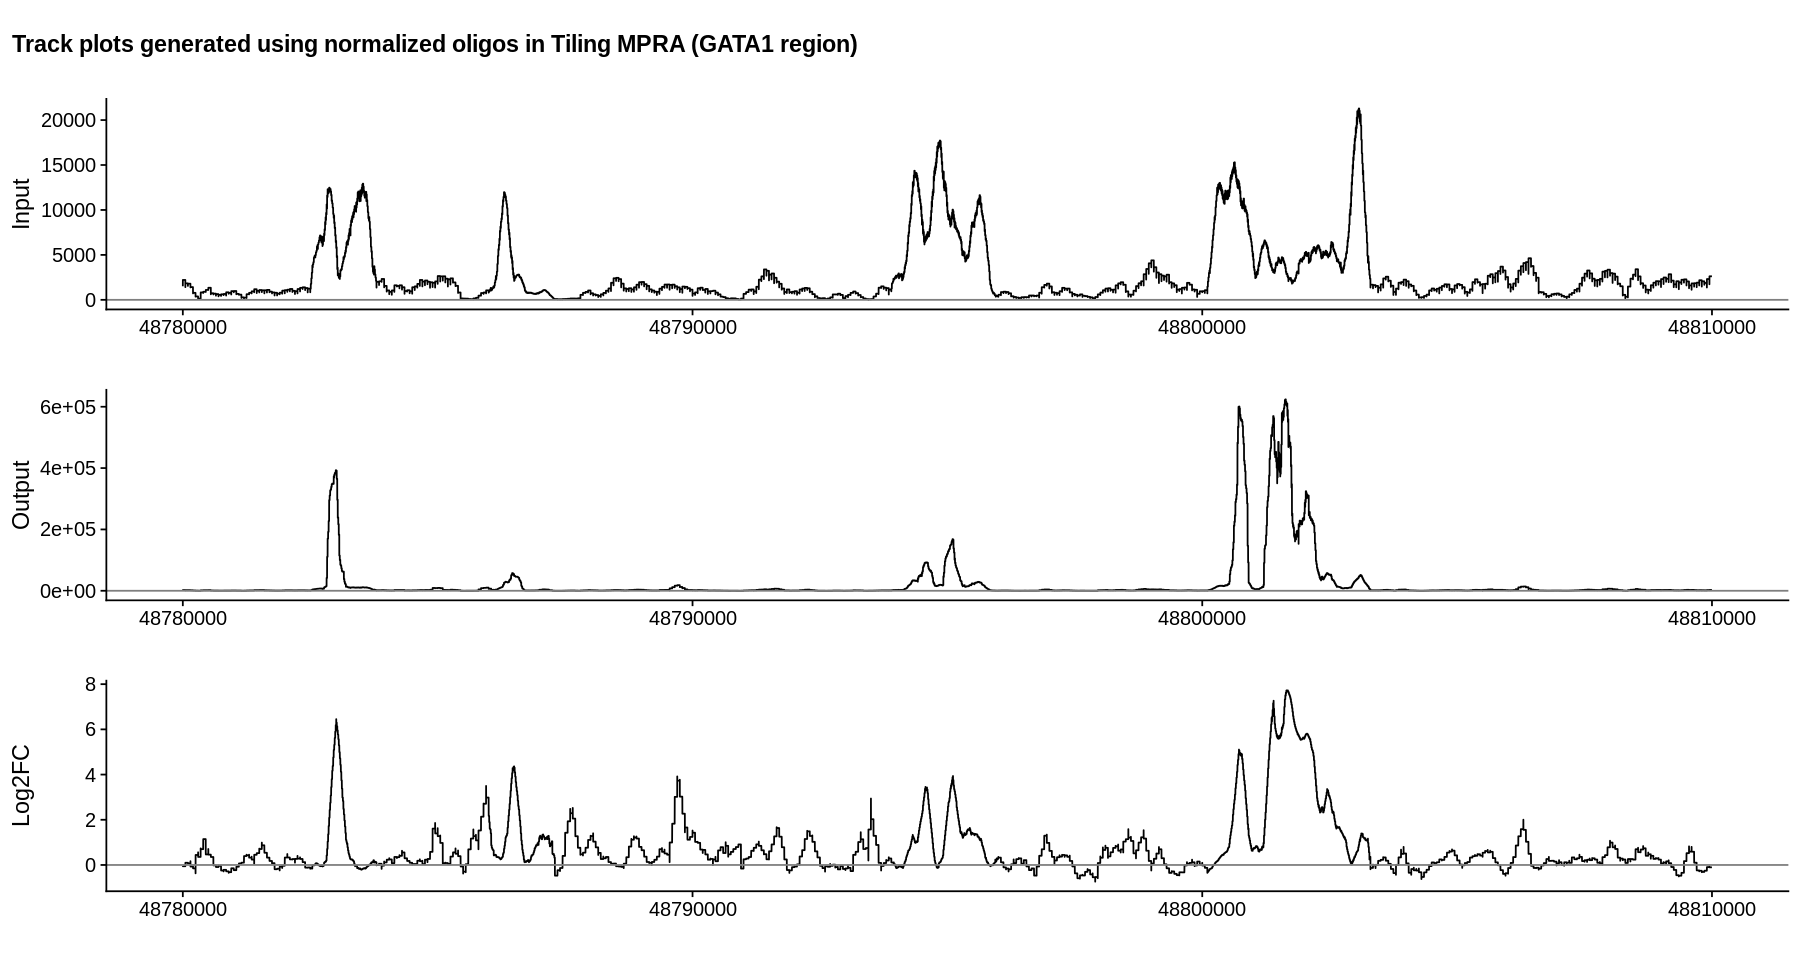

In [34]:
title = ggdraw() + 
  draw_label(
    "Track plots generated using normalized oligos in Tiling MPRA (GATA1 region)",
    fontface = 'bold',
    x = 0,
    hjust = 0
  ) +
  theme(
    # add margin on the left of the drawing canvas,
    # so title is aligned with left edge of first plot
    plot.margin = margin(0, 0, 0, 7)
  )

plot_row = plot_grid(plotlist = lst, align="v", ncol=1)

options(repr.plot.height=8, repr.plot.width=15)
plot_grid(
  title, plot_row,
  ncol = 1,
  # rel_heights values control vertical title margins
  rel_heights = c(0.1, 1)
)